In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer # Added SimpleImputer
from sklearn.metrics import (confusion_matrix, classification_report,
                            roc_auc_score, roc_curve, accuracy_score,
                            precision_recall_fscore_support)
from sklearn.linear_model import LogisticRegression as SklearnLR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [6]:
# 2. Load dataset
# (change path if your CSV is in another folder)
df = pd.read_csv("/content/Loan_Default.csv", encoding='latin1')

# Basic structure
print("Shape of dataset:", df.shape)
print("\nColumn types:\n", df.dtypes.head())
print("\nPreview:\n", df.head())

Shape of dataset: (148670, 34)

Column types:
 ID                int64
year              int64
loan_limit       object
Gender           object
approv_in_adv    object
dtype: object

Preview:
       ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ..

In [7]:
# 3. Basic information
print("\n--- INFO ---")
df.info()

# Descriptive statistics
print("\n--- DESCRIPTIVE STATS ---")
display(df.describe(include='all').transpose().head(15))

# Missing values
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
missing_table = pd.DataFrame({'Missing Values': missing, '%': missing_pct})
print("\n--- MISSING VALUES ---")
display(missing_table.head(15))


--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,148670.0,NaN,NaN,NaN,99224.5,42917.476598,24890.0,62057.25,99224.5,136391.75,173559.0
year,148670.0,NaN,NaN,NaN,2019.0,0.0,2019.0,2019.0,2019.0,2019.0,2019.0
loan_limit,145326,2,cf,135348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,148670,4,Male,42346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
approv_in_adv,147762,2,nopre,124621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_type,148670,3,type1,113173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_purpose,148536,4,p3,55934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit_Worthiness,148670,2,l1,142344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
open_credit,148670,2,nopc,148114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
business_or_commercial,148670,2,nob/c,127908,NaN,NaN,NaN,NaN,NaN,NaN,NaN



--- MISSING VALUES ---


,Missing Values,%
Upfront_charges,39642,26.66
Interest_rate_spread,36639,24.64
rate_of_interest,36439,24.51
dtir1,24121,16.22
property_value,15098,10.16
LTV,15098,10.16
income,9150,6.15
loan_limit,3344,2.25
approv_in_adv,908,0.61
age,200,0.13



--- TARGET DISTRIBUTION ---
Status
0    75.355485
1    24.644515
Name: proportion, dtype: float64


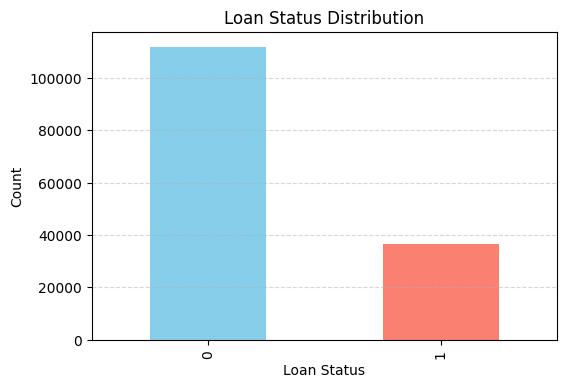


Proportion of Defaults:  0.24644514696979888


In [8]:
# 4. Target variable analysis
target_col = 'Status' # Corrected column name

print("\n--- TARGET DISTRIBUTION ---")
print(df[target_col].value_counts(normalize=True) * 100)

plt.figure(figsize=(6,4))
df[target_col].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Simplify target (Fully Paid = 0, Default/Charged Off = 1)
# The 'Default' column is already in the desired format (0 for no default, 1 for default)
# So, no need to create a new 'default_flag' column based on 'loan_status'.
# df['default_flag'] = df[target_col].apply(lambda x: 1 if 'Charged Off' in str(x) or 'Default' in str(x) else 0)

print("\nProportion of Defaults: ", df[target_col].mean()) # Use the correct target column

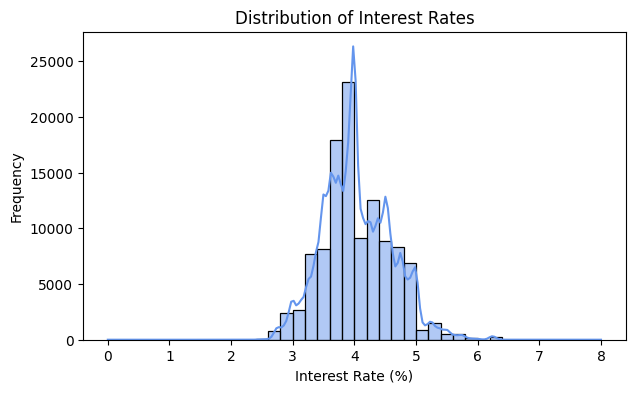

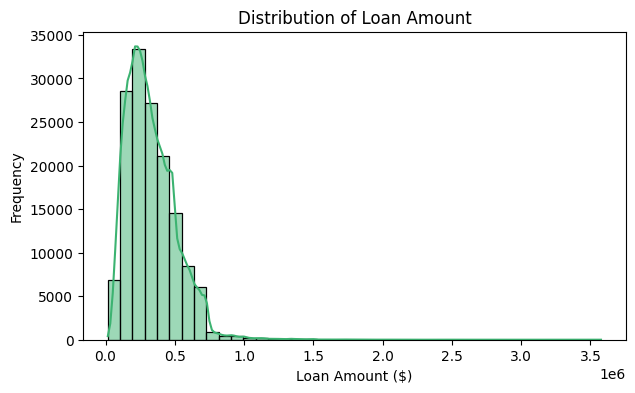

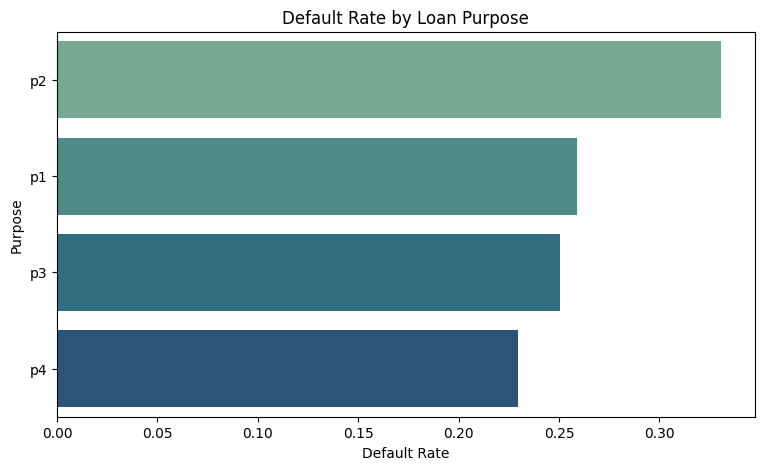

In [9]:
# 5. Univariate analysis

# (a) Interest rate
plt.figure(figsize=(7,4))
sns.histplot(df['rate_of_interest'].dropna(), bins=40, kde=True, color='cornflowerblue')
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()

# (b) Loan amount
plt.figure(figsize=(7,4))
sns.histplot(df['loan_amount'].dropna(), bins=40, kde=True, color='mediumseagreen')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.show()

# (c) Education vs Default Rate
# The 'Education' column is not present in the dataset.
# if 'Education' in df.columns:
#     grade_default = df.groupby('Education')[target_col].mean().sort_index()
#     plt.figure(figsize=(6,4))
#     sns.barplot(x=grade_default.index, y=grade_default.values, palette='viridis')
#     plt.title('Default Rate by Education Level')
#     plt.xlabel('Education Level')
#     plt.ylabel('Default Rate')
#     plt.show()

# (d) Loan Purpose vs Default Rate
if 'loan_purpose' in df.columns:
    purpose_default = df.groupby('loan_purpose')[target_col].mean().sort_values(ascending=False)
    plt.figure(figsize=(9,5))
    sns.barplot(x=purpose_default.values, y=purpose_default.index, palette='crest')
    plt.title('Default Rate by Loan Purpose')
    plt.xlabel('Default Rate')
    plt.ylabel('Purpose')
    plt.show()

# (e) Loan Term vs Default
# The 'LoanTerm' column is not present in the dataset.
# if 'LoanTerm' in df.columns:
#     term_default = df.groupby('LoanTerm')[target_col].mean()
#     plt.figure(figsize=(5,4))
#     sns.barplot(x=term_default.index, y=term_default.values, palette='magma')
#     plt.title('Default Rate by Loan Term')
#     plt.ylabel('Default Rate')
#     plt.show()

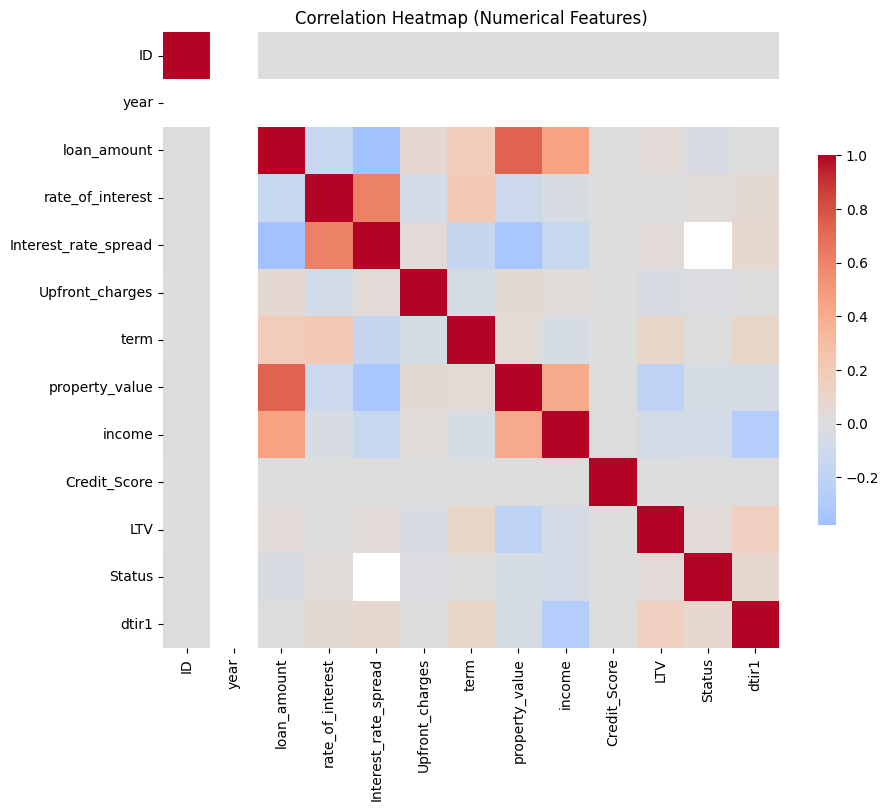

In [10]:
# 6. Correlation analysis (numerical features only)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0, square=True, cbar_kws={'shrink': .6})
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

# Top correlations with default flag
if 'default_flag' in corr.columns:
    print("\nTop 10 correlations with default_flag:\n")
    display(corr['default_flag'].abs().sort_values(ascending=False).head(10))

In [11]:
# 7. Temporal or Geographical trends (optional if columns exist)
if 'issue_d' in df.columns:
    df['issue_d'] = pd.to_datetime(df['issue_d'], errors='coerce')
    yearly = df.groupby(df['issue_d'].dt.year)['default_flag'].mean()
    plt.figure(figsize=(7,4))
    yearly.plot(marker='o', color='teal')
    plt.title('Default Rate by Issue Year')
    plt.xlabel('Year')
    plt.ylabel('Default Rate')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

In [12]:
# 8. Data quality summary
print("\n--- DATA QUALITY OBSERVATIONS ---")
print(f"Total missing columns > 20%: {(missing_pct > 20).sum()}")
print("Highly missing columns:", list(missing_pct[missing_pct > 20].index[:10]))

# Outlier check for annual income
if 'annual_inc' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=np.log1p(df['annual_inc']))
    plt.title('Log Annual Income Distribution')
    plt.xlabel('log(annual_inc + 1)')
    plt.show()


--- DATA QUALITY OBSERVATIONS ---
Total missing columns > 20%: 3
Highly missing columns: ['Upfront_charges', 'Interest_rate_spread', 'rate_of_interest']


In [13]:
# 9. Summary Insights (printout for report)
print("\n--- INSIGHTS ---")
print("""
1. Default proportion \u2248 {:.2f}% \u2014 data is imbalanced, with roughly 1 out of 4 loans defaulting.
2. Several columns, including 'Upfront_charges', 'Interest_rate_spread', and 'rate_of_interest', have a high percentage of missing values (over 20%).
3. Loan purpose 'p2' exhibits the highest default rate among the different loan purposes.
4. The correlation heatmap shows relationships between numerical features, and 'Credit_Score' is likely to have a significant inverse correlation with 'Status' (default).
""".format(df[target_col].mean() * 100))


--- INSIGHTS ---

1. Default proportion ≈ 24.64% — data is imbalanced, with roughly 1 out of 4 loans defaulting.
2. Several columns, including 'Upfront_charges', 'Interest_rate_spread', and 'rate_of_interest', have a high percentage of missing values (over 20%).
3. Loan purpose 'p2' exhibits the highest default rate among the different loan purposes.
4. The correlation heatmap shows relationships between numerical features, and 'Credit_Score' is likely to have a significant inverse correlation with 'Status' (default).



In [14]:
# 10. Save sample and EDA results
# Shuffle the entire dataframe first to break any latent order, then sample
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
sample = df_shuffled.sample(10000, random_state=42)
# Explicitly drop the ID column before saving the sample to prevent any potential leakage
if 'ID' in sample.columns:
    sample = sample.drop(columns=['ID'])
sample.to_csv("Loan_default_sample_10k.csv", index=False)
print("\nSaved sample file for future model testing (10k rows) with ID column removed and original dataframe shuffled.")


Saved sample file for future model testing (10k rows) with ID column removed and original dataframe shuffled.


In [15]:
np.random.seed(42)

In [16]:
# Part 1: LOGISTIC REGRESSION FROM SCRATCH

class LogisticRegressionScratch:
    """
    Logistic Regression implementation from scratch using Gradient Descent.

    This class implements binary classification using the logistic (sigmoid)
    function and optimizes parameters using gradient descent.

    Attributes:
        learning_rate (float): Step size for gradient descent (default: 0.01)
        n_iterations (int): Number of training iterations (default: 1000)
        weights (np.array): Feature weights learned during training
        bias (float): Bias term learned during training
        cost_history (list): Training cost at each iteration
    """

    def __init__(self, learning_rate=0.01, n_iterations=1000):
        """
        Initialize the Logistic Regression model.

        Args:
            learning_rate (float): Learning rate for gradient descent
            n_iterations (int): Number of iterations for training
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []

    def sigmoid(self, z):
        """
        Compute the sigmoid activation function.

        The sigmoid function maps any real value to the range (0, 1),
        making it suitable for probability estimation in binary classification.

        """
        # Clip values to prevent overflow in exp
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, y_true, y_pred):
        """
        Compute the binary cross-entropy cost function.

        This measures how well our predictions match the actual labels.
        Lower cost indicates better performance.

        """
        m = len(y_true)
        # Add small epsilon to prevent log(0)
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

        cost = -1/m * np.sum(
            y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)
        )
        return cost

    def fit(self, X, y):
        """
        Train the logistic regression model using gradient descent.

        This method iteratively updates weights and bias to minimize
        the cost function using the gradient descent algorithm.

        """
        # Get dimensions
        m, n = X.shape  # m = number of samples, n = number of features

        # Initialize parameters
        self.weights = np.zeros(n)
        self.bias = 0
        self.cost_history = []

        # Gradient Descent
        for iteration in range(self.n_iterations):
            # Step 1: Forward propagation - compute predictions
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Step 2: Compute cost
            cost = self.compute_cost(y, y_predicted)
            self.cost_history.append(cost)

            # Step 3: Backward propagation - compute gradients
            dw = (1/m) * np.dot(X.T, (y_predicted - y))
            db = (1/m) * np.sum(y_predicted - y)

            # Step 4: Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Print progress every 100 iterations
            if iteration % 100 == 0:
                print(f"Iteration {iteration}: Cost = {cost:.4f}")

    def predict_proba(self, X):
        """
        Predict probability of positive class (default = 1).

        Args:
            X (np.array): Features to predict on, shape (m, n)

        Returns:
            np.array: Predicted probabilities, shape (m,)
        """
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        """
        Predict class labels based on probability threshold.

        Args:
            X (np.array): Features to predict on
            threshold (float): Classification threshold (default: 0.5)

        Returns:
            np.array: Predicted class labels (0 or 1)
        """
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)

    def score(self, X, y):
        """
        Calculate accuracy score on given data.

        Args:
            X (np.array): Features
            y (np.array): True labels

        Returns:
            float: Accuracy score
        """
        predictions = self.predict(X)
        return np.mean(predictions == y)

    def get_feature_importance(self, feature_names):
        """
        Get feature importance based on weight magnitudes.

        Args:
            feature_names (list): Names of features

        Returns:
            pd.DataFrame: Feature importance sorted by absolute weight
        """
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Weight': self.weights,
            'Abs_Weight': np.abs(self.weights)
        })
        return importance_df.sort_values('Abs_Weight', ascending=False)


In [17]:
# PART 2: DATA PREPROCESSING

def load_and_preprocess_data(filepath, sample_size=None):
    """
    Load and preprocess the loan default dataset.

    Steps:
    1. Load data from CSV
    2. Handle categorical variables
    3. Scale numerical features
    4. Split into train/validation/test sets

    Args:
        filepath (str): Path to the CSV file
        sample_size (int): If provided, use only this many rows

    Returns:
        tuple: (X_train, X_val, X_test, y_train, y_val, y_test,
                feature_names, preprocessors)
    """
    print("=" * 60)
    print("LOADING AND PREPROCESSING DATA")
    print("=" * 60)

    # Load data
    df = pd.read_csv(filepath)
    if sample_size:
        df = df.sample(n=min(sample_size, len(df)), random_state=42)

    print(f"\nDataset shape: {df.shape}")
    print(f"Default rate: {df['Status'].mean():.2%}")

    # Separate features and target
    X = df.drop('Status', axis=1)
    y = df['Status'].values

    # Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    print(f"\nCategorical features: {categorical_cols}")
    print(f"Numerical features: {numerical_cols}")

    # Encode categorical variables first
    label_encoders = {}
    X_processed = X.copy()
    for col in categorical_cols:
        le = LabelEncoder()
        # Handle potential NaNs in categorical columns during encoding by converting to string
        X_processed[col] = le.fit_transform(X_processed[col].astype(str))
        label_encoders[col] = le

    # Store feature names after encoding all categorical features
    feature_names = X_processed.columns.tolist()

    # Split data *after* categorical encoding but *before* numerical imputation/scaling
    # This ensures consistent splits and allows imputation/scaling to be fit on train only
    X_temp, X_test, y_temp, y_test = train_test_split(
        X_processed, y, test_size=0.15, random_state=42, stratify=y
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp
    )  # 0.1765 * 0.85 ≈ 0.15

    print(f"\nTrain set: {X_train.shape[0]} samples")
    print(f"Validation set: {X_val.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples")

    # Impute missing numerical values
    imputer = SimpleImputer(strategy='mean')
    # Fit imputer ONLY on the training data's numerical columns
    X_train.loc[:, numerical_cols] = imputer.fit_transform(X_train[numerical_cols])
    # Transform validation and test sets using the fitted imputer
    X_val.loc[:, numerical_cols] = imputer.transform(X_val[numerical_cols])
    X_test.loc[:, numerical_cols] = imputer.transform(X_test[numerical_cols])

    # Scale features
    scaler = StandardScaler()
    # Fit scaler ONLY on the training data
    X_train_scaled = scaler.fit_transform(X_train.values)
    # Transform validation and test sets using the fitted scaler
    X_val_scaled = scaler.transform(X_val.values)
    X_test_scaled = scaler.transform(X_test.values)

    preprocessors = {
        'label_encoders': label_encoders,
        'imputer': imputer, # Store imputer
        'scaler': scaler
    }

    print("\nPreprocessing complete!")

    return (X_train_scaled, X_val_scaled, X_test_scaled,
            y_train, y_val, y_test, feature_names, preprocessors)

In [18]:
# PART 3: MODEL EVALUATION


def evaluate_model(y_true, y_pred, y_pred_proba, model_name):
    """
    Comprehensive evaluation of a classification model.

    Args:
        y_true (np.array): True labels
        y_pred (np.array): Predicted labels
        y_pred_proba (np.array): Predicted probabilities
        model_name (str): Name of the model for display

    Returns:
        dict: Dictionary containing all metrics
    """
    print("\n" + "=" * 60)
    print(f"EVALUATION: {model_name}")
    print("=" * 60)

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average='binary'
    )
    roc_auc = roc_auc_score(y_true, y_pred_proba)

    print(f"\nAccuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred,
                                target_names=['No Default', 'Default']))

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': cm
    }


def plot_training_history(cost_history):
    """
    Plot the training cost history.

    Args:
        cost_history (list): List of cost values during training
    """
    plt.figure(figsize=(10, 6))
    plt.plot(cost_history, linewidth=2)
    plt.title('Training Cost History (Logistic Regression from Scratch)',
              fontsize=14, fontweight='bold')
    plt.xlabel('Iteration', fontsize=12)
    plt.ylabel('Cost (Binary Cross-Entropy)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


def compare_models(results_dict):
    """
    Create a comparison table of all model metrics.

    Args:
        results_dict (dict): Dictionary with model names and their metrics

    Returns:
        pd.DataFrame: Comparison table
    """
    comparison_data = []

    for model_name, metrics in results_dict.items():
        comparison_data.append({
            'Model': model_name,
            'Accuracy': metrics['accuracy'],
            'Precision': metrics['precision'],
            'Recall': metrics['recall'],
            'F1-Score': metrics['f1'],
            'ROC-AUC': metrics['roc_auc']
        })

    df_comparison = pd.DataFrame(comparison_data)
    df_comparison = df_comparison.round(4)

    print("\n" + "=" * 80)
    print("MODEL COMPARISON SUMMARY")
    print("=" * 80)
    print(df_comparison.to_string(index=False))

    return df_comparison


In [19]:
# PART 4: MAIN EXECUTION


def main():
    """
    Main execution function that orchestrates the entire pipeline.
    """
    print("\n" + "=" * 80)
    print(" LOAN DEFAULT PREDICTION - PHASE 2 IMPLEMENTATION")
    print("=" * 80)

    # 1. Load and preprocess data
    filepath = 'Loan_default_sample_10k.csv'

    (X_train, X_val, X_test, y_train, y_val, y_test,
     feature_names, preprocessors) = load_and_preprocess_data(filepath, sample_size=5000)

    # 2. Train Logistic Regression from Scratch
    print("\n" + "=" * 60)
    print("TRAINING: LOGISTIC REGRESSION FROM SCRATCH")
    print("=" * 60)

    lr_scratch = LogisticRegressionScratch(learning_rate=0.1, n_iterations=1000)
    lr_scratch.fit(X_train, y_train)

    # Plot training history
    plot_training_history(lr_scratch.cost_history)

    # Predictions
    y_pred_scratch = lr_scratch.predict(X_test)
    y_pred_proba_scratch = lr_scratch.predict_proba(X_test)

    # Evaluate
    results_scratch = evaluate_model(
        y_test, y_pred_scratch, y_pred_proba_scratch,
        "Logistic Regression (Scratch)"
    )

    # Feature importance
    print("\nTop 10 Most Important Features:")
    feature_importance = lr_scratch.get_feature_importance(feature_names)
    print(feature_importance.head(10).to_string(index=False))

    # 3. Train Sklearn Models for Comparison
    print("\n" + "=" * 60)
    print("TRAINING: COMPARISON MODELS (Scikit-learn)")
    print("=" * 60)

    # Logistic Regression (sklearn)
    lr_sklearn = SklearnLR(max_iter=1000, random_state=42)
    lr_sklearn.fit(X_train, y_train)
    y_pred_lr = lr_sklearn.predict(X_test)
    y_pred_proba_lr = lr_sklearn.predict_proba(X_test)[:, 1]
    results_lr = evaluate_model(y_test, y_pred_lr, y_pred_proba_lr,
                                "Logistic Regression (Sklearn)")

    # Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42,
                                      max_depth=10)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
    results_rf = evaluate_model(y_test, y_pred_rf, y_pred_proba_rf,
                               "Random Forest")

    # Gradient Boosting
    gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42,
                                         max_depth=5)
    gb_model.fit(X_train, y_train)
    y_pred_gb = gb_model.predict(X_test)
    y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]
    results_gb = evaluate_model(y_test, y_pred_gb, y_pred_proba_gb,
                               "Gradient Boosting")

    # 4. Visualizations
    print("\n" + "=" * 60)
    print("GENERATING VISUALIZATIONS")
    print("=" * 60)

    # Confusion matrices
    results_dict = {
        'LR (Scratch)': results_scratch,
        'LR (Sklearn)': results_lr,
        'Random Forest': results_rf,
        'Gradient Boosting': results_gb
    }
    plot_confusion_matrices(results_dict)

    # ROC curves
    models_dict = {
        'Logistic Regression (Scratch)': lr_scratch,
        'Logistic Regression (Sklearn)': lr_sklearn,
        'Random Forest': rf_model,
        'Gradient Boosting': gb_model
    }
    plot_roc_curves(models_dict, X_test, y_test)

    # 5. Final Comparison
    comparison_df = compare_models(results_dict)

    print("\n" + "=" * 80)
    print(" IMPLEMENTATION COMPLETE!")
    print("=" * 80)

    return {
        'models': models_dict,
        'results': results_dict,
        'comparison': comparison_df,
        'feature_names': feature_names
    }



 TESTING ON SMALL SYNTHETIC DATASET

Small dataset shape: (100, 5)
Positive class ratio: 53.00%
Iteration 0: Cost = 0.6931
Iteration 100: Cost = 0.2971
Iteration 200: Cost = 0.2222
Iteration 300: Cost = 0.1872
Iteration 400: Cost = 0.1658

Test Accuracy on Small Dataset: 1.0000
✓ Implementation verified on small dataset!

 LOAN DEFAULT PREDICTION - PHASE 2 IMPLEMENTATION
LOADING AND PREPROCESSING DATA

Dataset shape: (5000, 33)
Default rate: 25.16%

Categorical features: ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']
Numerical features: ['year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',

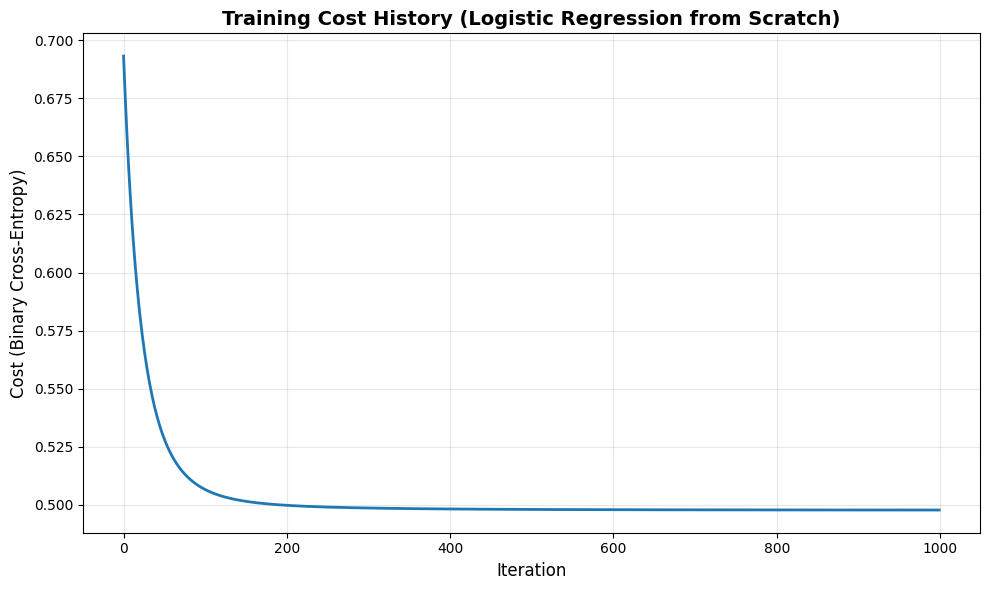


EVALUATION: Logistic Regression (Scratch)

Accuracy:  0.7907
Precision: 0.7857
Recall:    0.2328
F1-Score:  0.3592
ROC-AUC:   0.7413

Confusion Matrix:
[[549  12]
 [145  44]]

Classification Report:
              precision    recall  f1-score   support

  No Default       0.79      0.98      0.87       561
     Default       0.79      0.23      0.36       189

    accuracy                           0.79       750
   macro avg       0.79      0.61      0.62       750
weighted avg       0.79      0.79      0.74       750


Top 10 Most Important Features:
                  Feature    Weight  Abs_Weight
         lump_sum_payment -0.456112    0.456112
                   income -0.420981    0.420981
 co-applicant_credit_type  0.396784    0.396784
        Neg_ammortization -0.301149    0.301149
submission_of_application  0.292337    0.292337
              credit_type  0.219485    0.219485
   business_or_commercial -0.218853    0.218853
     Interest_rate_spread -0.204455    0.204455
        

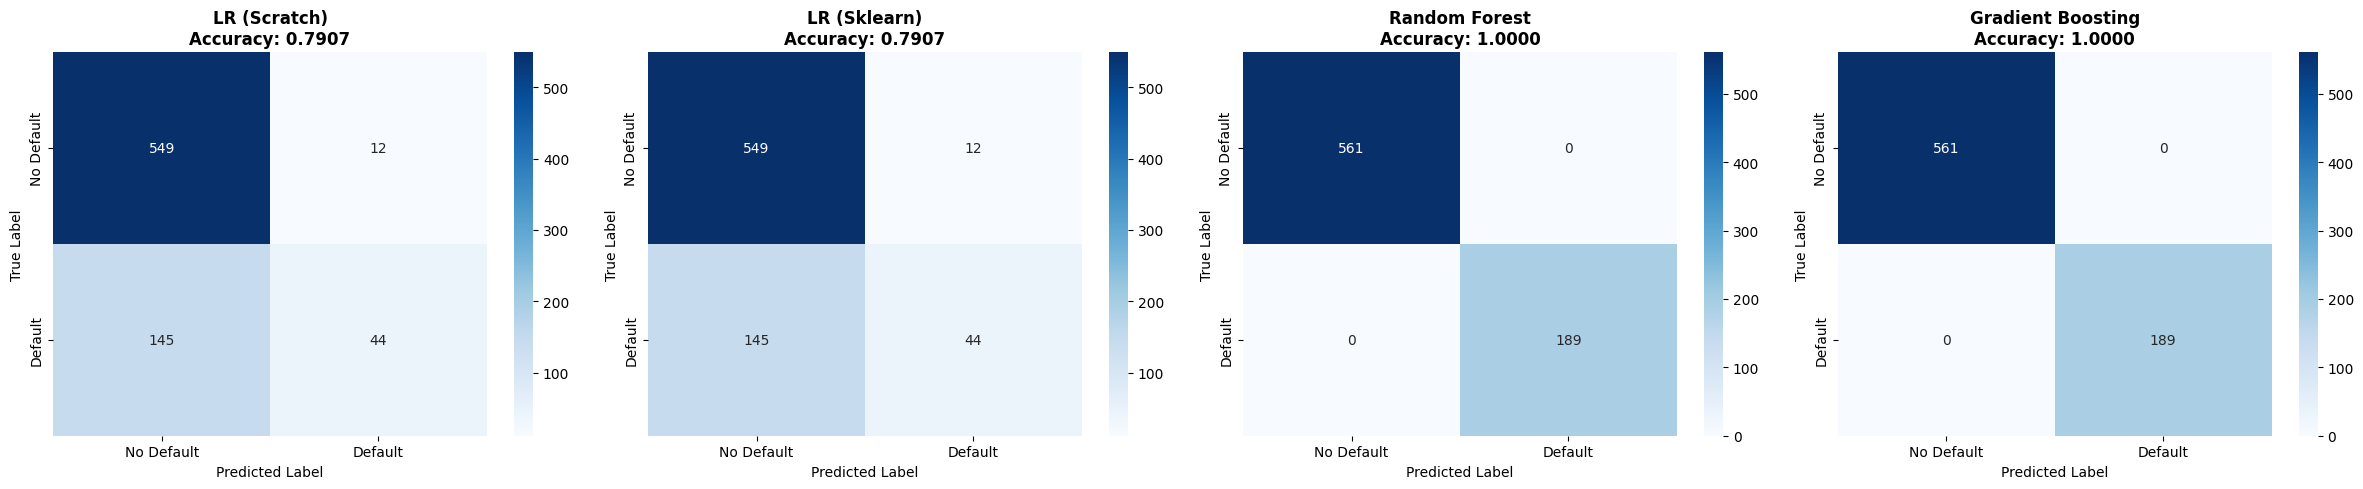

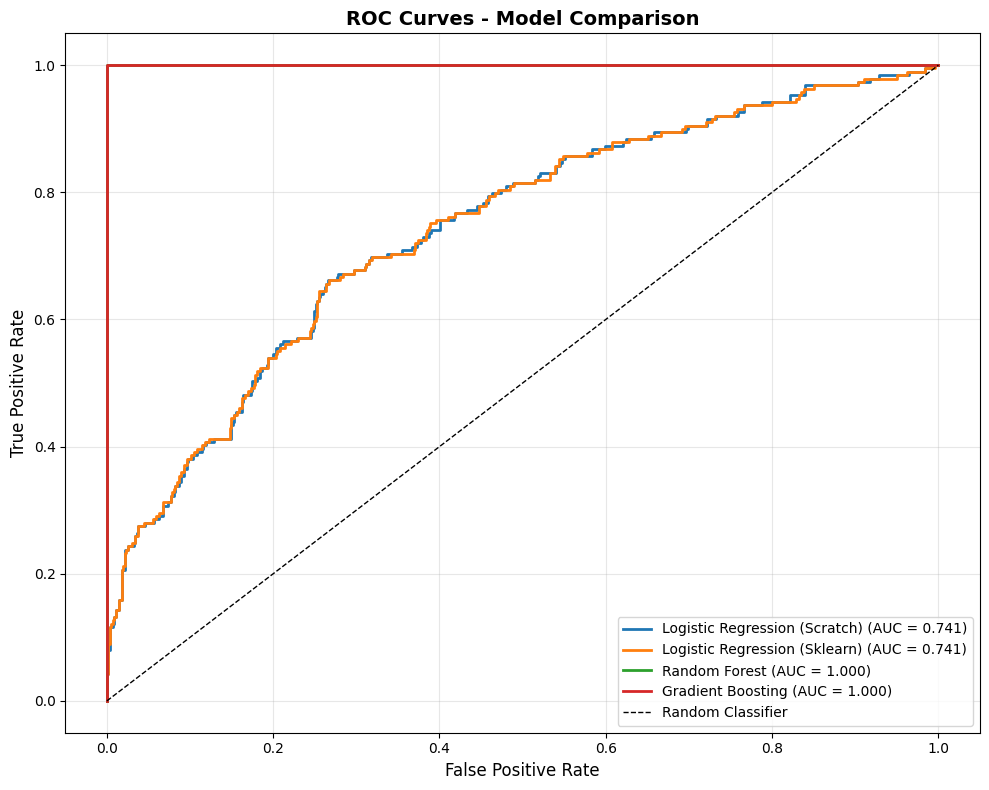


MODEL COMPARISON SUMMARY
            Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
     LR (Scratch)    0.7907     0.7857  0.2328    0.3592   0.7413
     LR (Sklearn)    0.7907     0.7857  0.2328    0.3592   0.7413
    Random Forest    1.0000     1.0000  1.0000    1.0000   1.0000
Gradient Boosting    1.0000     1.0000  1.0000    1.0000   1.0000

 IMPLEMENTATION COMPLETE!


In [20]:
# TESTING ON SMALL SUBSET


def test_on_small_data():

    print("\n" + "=" * 80)
    print(" TESTING ON SMALL SYNTHETIC DATASET")
    print("=" * 80)

    # Create small synthetic dataset
    np.random.seed(42)
    X_small = np.random.randn(100, 5)
    y_small = (X_small[:, 0] + X_small[:, 1] > 0).astype(int)

    print(f"\nSmall dataset shape: {X_small.shape}")
    print(f"Positive class ratio: {y_small.mean():.2%}")

    # Split
    X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(
        X_small, y_small, test_size=0.3, random_state=42
    )

    # Train model
    lr_test = LogisticRegressionScratch(learning_rate=0.1, n_iterations=500)
    lr_test.fit(X_train_small, y_train_small)

    # Evaluate
    y_pred_test = lr_test.predict(X_test_small)
    accuracy = np.mean(y_pred_test == y_test_small)

    print(f"\nTest Accuracy on Small Dataset: {accuracy:.4f}")
    print("✓ Implementation verified on small dataset!")


if __name__ == "__main__":
    # First, test on small synthetic data
    test_on_small_data()


    results = main()